### DEVELOP A NEURAL NETWORK THAT CAN READ HANDWRITING by TITHI DEB

##### Explanation:
* Import the libraries.
* Load the datasets.
* Then plot the graph.
* Then we need to preprocess the dataset.
* Build and train the model.
* Then save and load the model.
* Now  we evalute the model.
* Then validate the trainning and testing dataset.
* Now we can test the model.

#### IMPORTING THE LIBRARIES

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#### LOADING THE DATASET

In [28]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

#### PLOTTING THE GRAPH

<Axes: ylabel='count'>

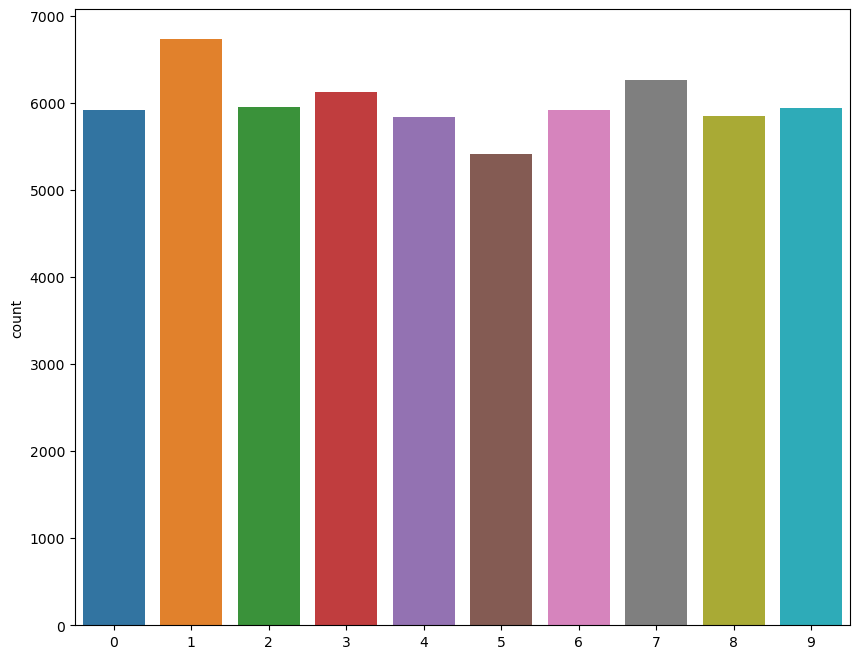

In [3]:
plt.figure(figsize=(10, 8))
sns.countplot(x=y_train)

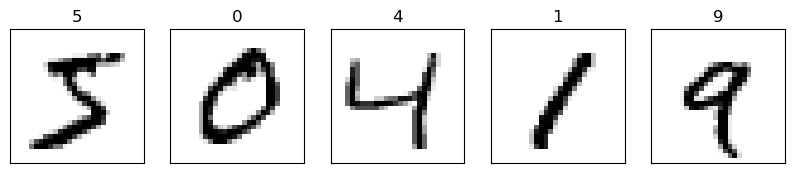

In [4]:
fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray_r')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

#### PRE-PROCESSING THE DATASET

In [29]:
print('Training images shape : ',x_train.shape)
print('Testing images shape : ',x_test.shape)

Training images shape :  (60000, 28, 28)
Testing images shape :  (10000, 28, 28)


In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [7]:
x_train=x_train/255.0
x_testg=x_test/255.0
num_classes = 10

#### TRAINING THE MODEL

CNN + Three layers + relu + (3,3) kernel_size + Dropout rate (0.3)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [9]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3),
                 activation=tf.nn.relu,
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation=tf.nn.softmax))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 26, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0

In [11]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history=model.fit(x=x_train,
                  y=y_train,
                  validation_split=0.1,
                  epochs=10)

Epoch 1/10
1688/1688 [==============================] - 146s 86ms/step - loss: 0.2716 - accuracy: 0.9221 - val_loss: 0.0824 - val_accuracy: 0.9815
Epoch 2/10
1688/1688 [==============================] - 129s 77ms/step - loss: 0.0656 - accuracy: 0.9804 - val_loss: 0.0936 - val_accuracy: 0.9872
Epoch 6/10
1688/1688 [==============================] - 132s 78ms/step - loss: 0.0618 - accuracy: 0.9823 - val_loss: 0.0782 - val_accuracy: 0.9890
Epoch 7/10
1688/1688 [==============================] - 131s 78ms/step - loss: 0.0521 - accuracy: 0.9840 - val_loss: 0.0708 - val_accuracy: 0.9892
Epoch 8/10
1688/1688 [==============================] - 135s 80ms/step - loss: 0.0496 - accuracy: 0.9854 - val_loss: 0.0865 - val_accuracy: 0.9893
Epoch 9/10
1688/1688 [==============================] - 140s 83ms/step - loss: 0.0448 - accuracy: 0.9868 - val_loss: 0.1235 - val_accuracy: 0.9860
Epoch 10/10
1688/1688 [==============================] - 131s 77ms/step - loss: 0.0414 - accuracy: 0.9877 - val_loss: 

#### SAVING AND LOADING THE MODEL

In [30]:
model.save('MNproject.h5')

In [21]:
from tensorflow.keras.models import load_model
model = load_model('MNproject.h5')

#### EVALUATING THE MODEL

In [22]:
loss_and_acc=model.evaluate(x_test,y_test)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 [==============================] - 7s 20ms/step - loss: 3.0931 - accuracy: 0.9860
Test Loss 3.0931379795074463
Test Accuracy 0.9860000014305115


#### TRAINING AND VALIDATION

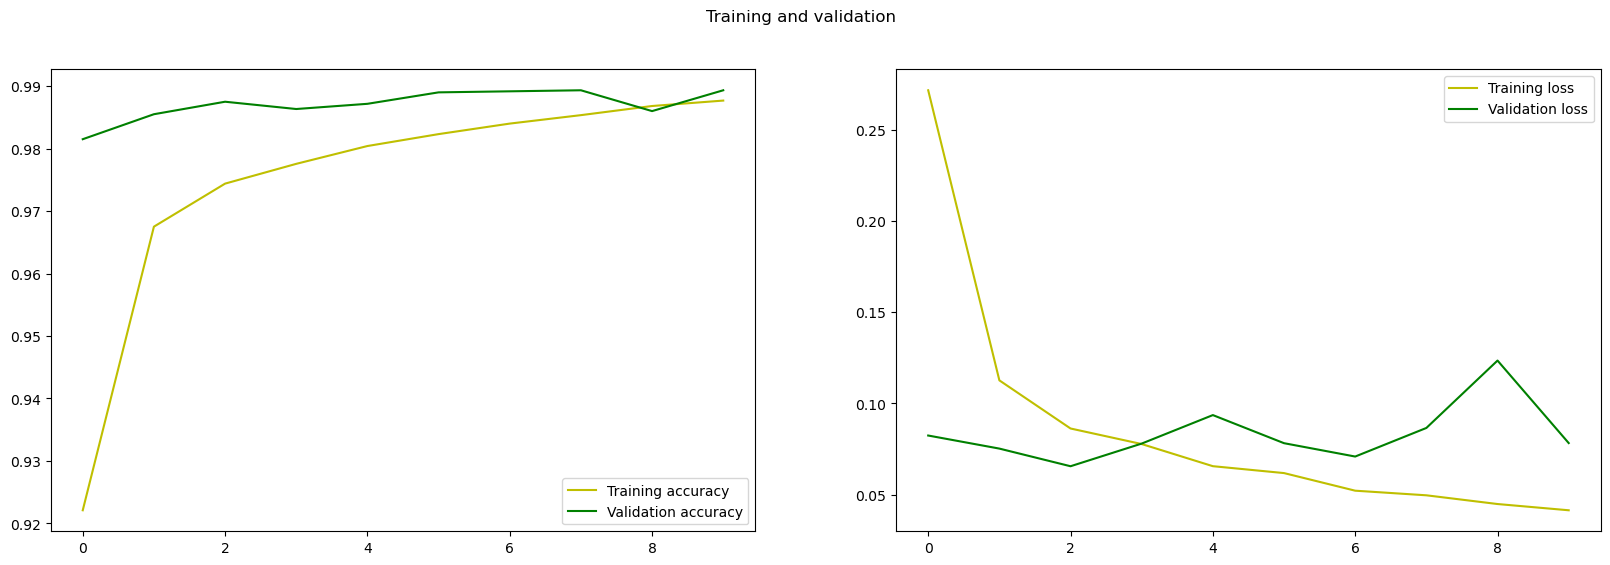

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

In [24]:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

313/313 [==============================] - 8s 25ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    5,    2,    1,    1,    2,    0,    3,    1],
       [   2, 1111,    2,    3,    7,    1,    2,    5,    2,    0],
       [   0,    0, 1029,    1,    1,    0,    0,    0,    1,    0],
       [   0,    0,    0, 1008,    0,    1,    0,    0,    1,    0],
       [   0,    0,    0,    0,  980,    0,    0,    0,    1,    1],
       [   0,    0,    0,    9,    0,  881,    1,    0,    1,    0],
       [   3,    2,    1,    0,    4,    4,  940,    0,    4,    0],
       [   0,    0,    6,    1,    4,    0,    0,  995,    4,   18],
       [   0,    0,    3,    1,    0,    0,    0,    0,  970,    0],
       [   1,    0,    1,    7,    8,    4,    0,    1,    6,  981]])>

Text(95.72222222222221, 0.5, 'Truth')

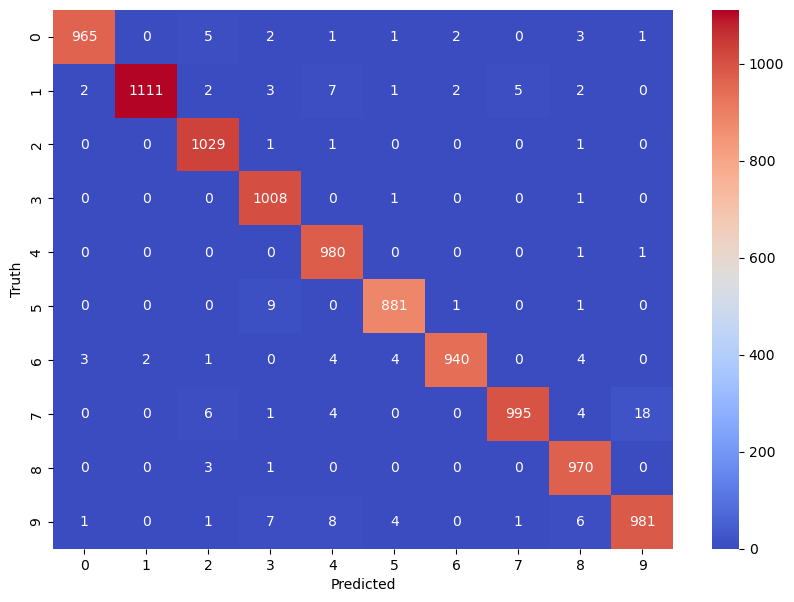

In [25]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### TESTING THE MODEL

313/313 [==============================] - 6s 18ms/step
Predicted Value:  9
Successful prediction


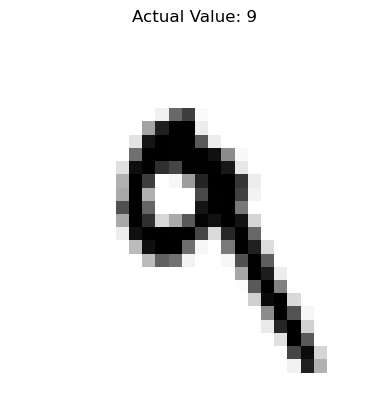

In [26]:
plt.imshow(x_test[7],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[7]))
prediction=model.predict(x_test)

plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[7]))
if(y_test[7]==(np.argmax(prediction[7]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')

313/313 [==============================] - 6s 18ms/step
Predicted Value:  2
Successful prediction


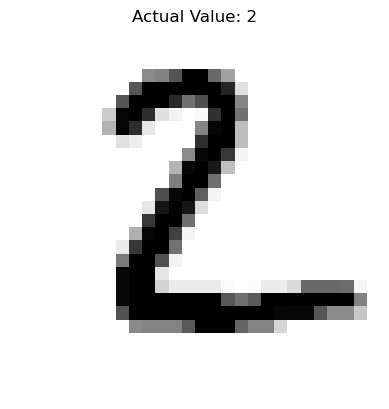

In [27]:
plt.imshow(x_test[1],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[1]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[1]))
if(y_test[1]==(np.argmax(prediction[1]))):
  print('Successful prediction')
else:
  print('Unsuccessful prediction')